In [3]:
import sys
import os
import torch
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from timm.models import create_model
from timm.data import create_dataset, create_loader

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
teacher_model = create_model(
                            'resnet101',
                            in_chans=None,
                            num_classes=100,
                            drop_rate=0.,
                            drop_path_rate=None,
                            drop_block_rate=None,
                            global_pool=None,
                            bn_momentum=None,
                            bn_eps=None,
                            checkpoint_path='C:/Users/Martin/Documents/School/Thesis/Git Repository/pytorch-image-models/trained-models/Resnet101-Teacher.tar',
                            )
teacher_model.to(device)
teacher_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [46]:
student_model = create_model(
                            'resnet18',
                            in_chans=None,
                            num_classes=100,
                            drop_rate=0.,
                            drop_path_rate=None,
                            drop_block_rate=None,
                            global_pool=None,
                            bn_momentum=None,
                            bn_eps=None,
                            checkpoint_path='C:/Users/Martin/Documents/School/Thesis/Git Repository/pytorch-image-models/trained-models/Resnet18-Student.tar',
                            )
student_model.to(device)
student_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act1): ReLU(inplace=True)
      (aa): Identity()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, m

In [34]:
student_model_epoch0 = create_model(
                            'resnet18',
                            in_chans=None,
                            num_classes=100,
                            drop_rate=0.,
                            drop_path_rate=None,
                            drop_block_rate=None,
                            global_pool=None,
                            bn_momentum=None,
                            bn_eps=None,
                            checkpoint_path=None,
                            )
student_model_epoch0.to(device)
student_model_epoch0.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act1): ReLU(inplace=True)
      (aa): Identity()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, m

In [7]:
dataset_train = create_dataset(
        "cifar",
        root="C:/Users/Martin/Documents/School/Thesis/cifar100",
        split="train",
        is_training=True,
        class_map="",
        download=False,
        batch_size=1000,
        seed=2308,
        repeats=0,
        input_img_mode='RGB',
        input_key=None,
        target_key=None,
        num_samples=None,
    )

In [8]:
loader_train = create_loader(
        dataset_train,
        input_size=(3,24,24),
        batch_size=1000,
        is_training=True,
        no_aug=False,
        re_prob=0,
        re_mode="pixel",
        re_count=1,
        re_split=False,
        train_crop_mode=None,
        scale=[0.08, 1.0],
        ratio=[3. / 4., 4. / 3.],
        hflip=0.5,
        vflip=0,
        color_jitter=0.4,
        color_jitter_prob=None,
        grayscale_prob=None,
        gaussian_blur_prob=None,
        auto_augment=None,
        num_aug_repeats=0,
        num_aug_splits=0,
        interpolation="random",
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
        num_workers=4,
        distributed=False,
        collate_fn=None,
        pin_memory=False,
        device=device,
        use_prefetcher=False,
        use_multi_epochs_loader=False,
        worker_seeding="all",
    )

In [36]:
def renyi_divergence_gradient(x, y, alpha, T=1.0):
    """
    Computes the gradient of the Rényi divergence D_alpha(P || Q) with respect to x.

    Parameters:
        x (torch.Tensor): Logits for distribution Q (on any device).
        y (torch.Tensor): Logits for distribution P (on any device).
        alpha (float): The Rényi divergence parameter.
        T (float): Temperature scaling parameter (default=1.0).

    Returns:
        torch.Tensor: The gradient of the Rényi divergence w.r.t x.
    """
    
    term_1 = torch.softmax(alpha * (y/T) + (1-alpha) * (x/T), dim=1)
    term_2 = torch.softmax(x/T, dim=1)
    
    gradient =  - 1/T * term_1 + term_2

    return gradient

In [87]:
def create_gradient_plot(data,alphas,alpha_adjusted=False,title_adjusted="",baseline=False):
    # Define labels to filter
    labels = [0, 1, 10, 11]
    counts = data.label.value_counts()
    notes = ['None','Student','Teacher','Both']
    
    # Create 2x2 subplot grid
    fig, axes = plt.subplots(2, 2, figsize=(8, 5))
    
    # Flatten axes array for easier iteration
    axes = axes.flatten()
    
    # Loop through each label and plot
    for i, label in enumerate(labels):
        subset = data[data.label == label].drop(columns=['label'])
        if alpha_adjusted:
            subset = subset.div(alphas, axis=1)
        if baseline:
            subset = subset.div(subset[1], axis=0)
        sns.boxplot(data=subset, showfliers=False, ax=axes[i])
        axes[i].set_title(f"Label {label}: {notes[i]} ({counts[label]} obs)")
        axes[i].set_xlabel(r'$\alpha$')
    
    
    if alpha_adjusted:
        if baseline:
            fig.suptitle(f"Gradients Boxplots - Alpha Adjusted with Baseline in Alpha = 1 - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
        else:
            fig.suptitle(f"Gradients Boxplots - Alpha Adjusted - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
    else:
        if baseline:
            fig.suptitle(f"Gradients Boxplots - Without Adjustment with Baseline in Alpha = 1 - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
        else:
            fig.suptitle(f"Gradients Boxplots - Without Adjustment - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

In [88]:
def gradient_plot(student_model,teacher_model,title_adjusted,temperature=1,baseline=False):
    for batch_idx, (input, target) in enumerate(loader_train):
        input, target = input.to(device), target.to(device)
        teacher_output = teacher_model(input)
        student_output = student_model(input)
        teacher_pred = torch.argmax(teacher_output, dim=1)
        student_pred = torch.argmax(student_output, dim=1)
        break
        
    grads = []
    alphas = [0.5,0.625,0.75,0.875,1,1.25,1.5,2,5]
    for alpha in alphas:
        grads.append(renyi_divergence_gradient(student_output,teacher_output,alpha,temperature).reshape(-1).detach().cpu().numpy() * temperature ** 2)
        
    data = pd.DataFrame({cat: arr for cat, arr in zip(alphas, grads)})
    
    one_hot_teacher = torch.zeros((teacher_pred.shape[0], 100), device='cuda:0')
    one_hot_teacher.scatter_(1, teacher_pred.unsqueeze(1), 1)
    
    one_hot_student = torch.zeros((student_pred.shape[0], 100), device='cuda:0')
    one_hot_student.scatter_(1, student_pred.unsqueeze(1), 1)
    
    label = one_hot_teacher.reshape(-1) * 10 + one_hot_student.reshape(-1)
    data['label'] = label.cpu().numpy()
    
    create_gradient_plot(data,alphas,alpha_adjusted=False,title_adjusted=title_adjusted,baseline=baseline)
    
    create_gradient_plot(data,alphas,alpha_adjusted=True,title_adjusted=title_adjusted,baseline=baseline)

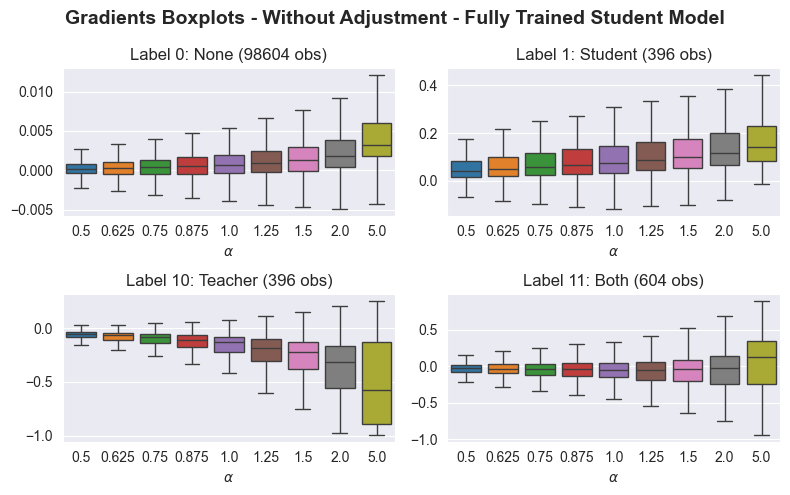

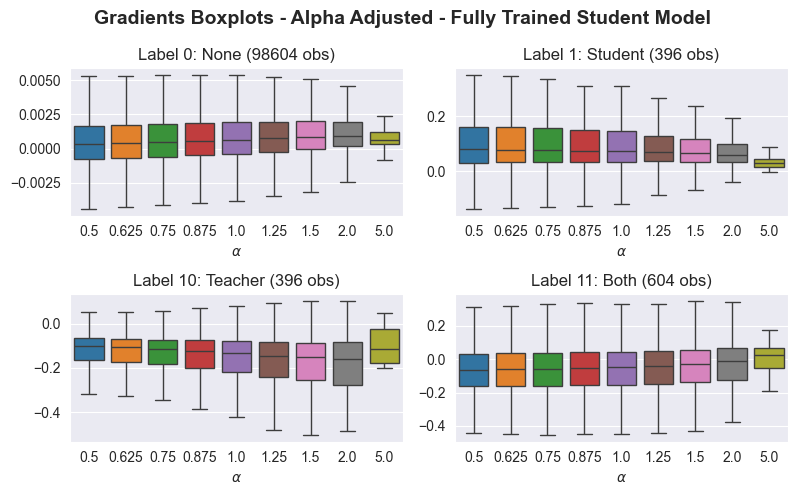

In [50]:
gradient_plot(student_model,teacher_model,title_adjusted="Fully Trained",temperature=1)

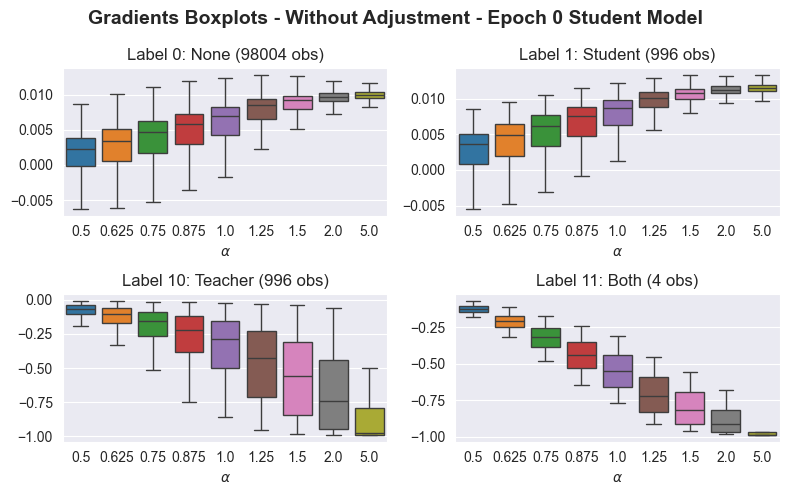

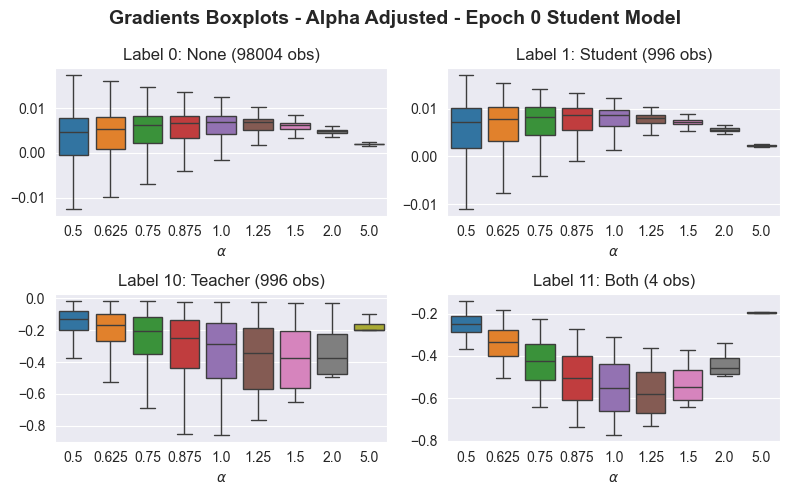

In [48]:
gradient_plot(student_model_epoch0,teacher_model,title_adjusted="Epoch 0",temperature=1)

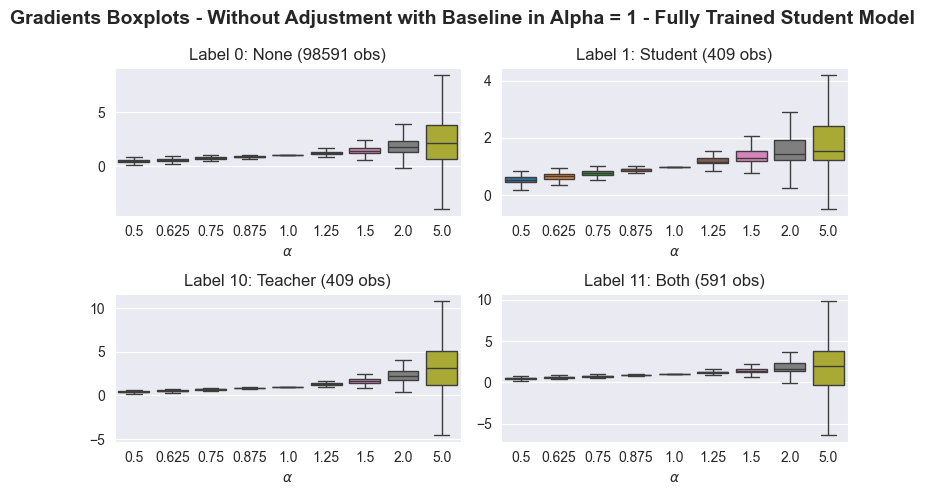

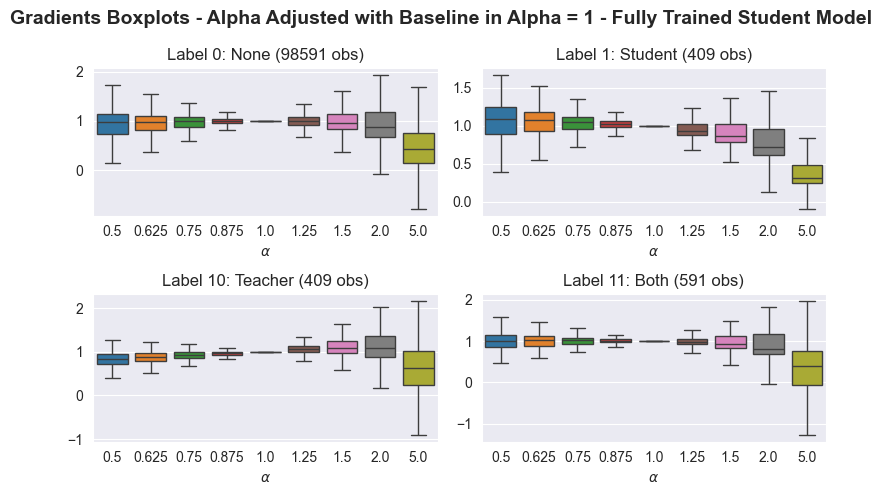

In [91]:
gradient_plot(student_model, teacher_model, title_adjusted="Fully Trained", temperature=1,baseline=True)

In [79]:
def logit_plot(student_model,teacher_model,title_adjusted,temperature=1):
    for batch_idx, (input, target) in enumerate(loader_train):
        input, target = input.to(device), target.to(device)
        teacher_output = teacher_model(input)
        student_output = student_model(input)
        teacher_pred = torch.argmax(teacher_output, dim=1)
        student_pred = torch.argmax(student_output, dim=1)
        break
        
    data =  [teacher_output.reshape(-1).detach().cpu().numpy(),student_output.reshape(-1).detach().cpu().numpy()]
    
    data = pd.DataFrame({cat: arr for cat, arr in zip(["teacher","student"], data)})
    
    one_hot_teacher = torch.zeros((teacher_pred.shape[0], 100), device='cuda:0')
    one_hot_teacher.scatter_(1, teacher_pred.unsqueeze(1), 1)
    
    one_hot_student = torch.zeros((student_pred.shape[0], 100), device='cuda:0')
    one_hot_student.scatter_(1, student_pred.unsqueeze(1), 1)
    
    label = one_hot_teacher.reshape(-1) * 10 + one_hot_student.reshape(-1)
    data['label'] = label.cpu().numpy()
    
    ## Ploting
    labels = [0, 1, 10, 11]
    counts = data.label.value_counts()
    notes = ['None','Student','Teacher','Both']
    
    # Create 2x2 subplot grid
    fig, axes = plt.subplots(2, 2, figsize=(8, 5))
    
    # Flatten axes array for easier iteration
    axes = axes.flatten()
    
    # Loop through each label and plot
    for i, label in enumerate(labels):
        subset = data[data.label == label].drop(columns=['label'])
        sns.boxplot(data=subset, showfliers=False, ax=axes[i])
        axes[i].set_title(f"Label {label}: {notes[i]} ({counts[label]} obs)")
        axes[i].set_xlabel(r'$\alpha$')
    
    fig.suptitle(f"Logits Boxplots - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

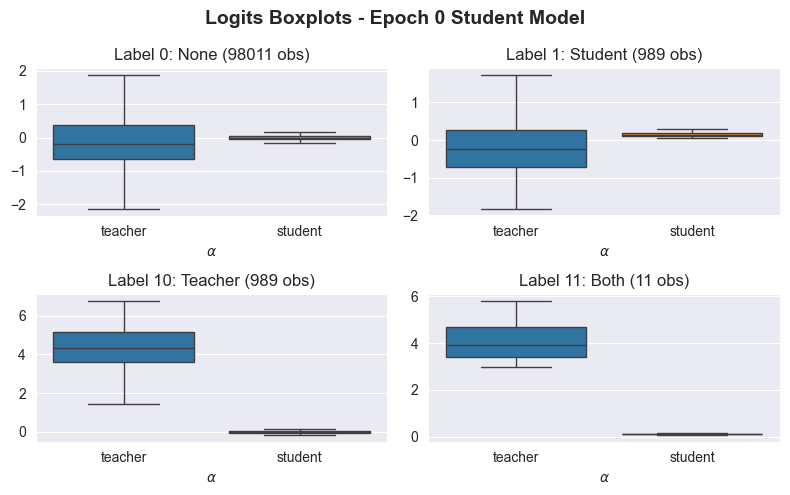

In [80]:
logit_plot(student_model_epoch0,teacher_model,title_adjusted="Epoch 0",temperature=1)